Extracted from: https://blog.paperspace.com/mean-average-precision/

To evaluate object detection models like R-CNN and YOLO, the mean average precision (mAP) is used. The mAP compares the ground-truth bounding box to the detected box and returns a score. The higher the score, the more accurate the model is in its detections.

Here are the sections covered in this tutorial:

From Prediction Score to Class Label
Precision-Recall Curve
Average Precision (AP)
Intersection over Union (IoU)
Mean Average Precision (mAP) for Object Detection

## From Prediction Score to Class Label

In this section we'll do a quick review of how a class label is derived from a prediction score.

Given that there are two classes, Positive and Negative, here are the ground-truth labels of 10 samples.

In [14]:
y_true = ["positive", "negative", "negative", "positive", "positive", "positive", "negative", "positive", "negative", "positive"]

When these samples are fed to the model it returns the following prediction scores. Based on these scores, how do we classify the samples (i.e. assign a class label to each sample)?

In [15]:
pred_scores = [0.7, 0.3, 0.5, 0.6, 0.55, 0.9, 0.4, 0.2, 0.4, 0.3]

To convert the scores into a class label, a threshold is used. When the score is equal to or above the threshold, the sample is classified as one class. Otherwise, it is classified as the other class. Let's agree that a sample is Positive if its score is above or equal to the threshold. Otherwise, it is Negative. The next block of code converts the scores into class labels with a threshold of 0.5.

In [16]:
import numpy

pred_scores = [0.7, 0.3, 0.5, 0.6, 0.55, 0.9, 0.4, 0.2, 0.4, 0.3]
y_true = ["positive", "negative", "negative", "positive", "positive", "positive", "negative", "positive", "negative", "positive"]

threshold = 0.5
y_pred = ["positive" if score >= threshold else "negative" for score in pred_scores]
print(y_pred)

['positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative']


Now both the ground-truth and predicted labels are available in the y_true and y_pred variables. Based on these labels, the confusion matrix, precision, and recall can be calculated.

In [17]:
import sklearn
import sklearn.metrics 

r = numpy.flip(sklearn.metrics.confusion_matrix(y_true, y_pred))
print(r)

precision = sklearn.metrics.precision_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
print(precision)

recall = sklearn.metrics.recall_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
print(recall)

[[4 2]
 [1 3]]
0.8
0.6666666666666666


Confusion Matrix (From Left to Right & Top to Bottom: True Positive, False Negative, False Positive, True Negative)
[[4 2]
 [1 3]]

Precision = 4/(4+1)
0.8

Recall = 4/(4+2)
0.6666666666666666

<div> <img src="images/fig52.png" alt="Drawing" style="width: 500px;"/></div> 

After this quick review of calculating the precision and recall, in the next section we'll discuss creating the precision-recall curve.

## Precision-Recall Curve

From the definition of both the precision and recall, the higher the precision, the more confident the model is when it classifies a sample as Positive. The higher the recall, the more positive samples the model correctly classified as Positive.

> **When a model has high recall but low precision, then the model classifies most of the positive samples correctly but it has many false positives (i.e. classifies many Negative samples as Positive). When a model has high precision but low recall, then the model is accurate when it classifies a sample as Positive but it may classify only some of the positive samples.**

Due to the importance of both precision and recall, there is a precision-recall curve the shows the tradeoff between the precision and recall values for different thresholds. This curve helps to select the best threshold to maximize both metrics.

There are some inputs needed to create the precision-recall curve:

- The ground-truth labels.
- The prediction scores of the samples.
- Some thresholds to convert the prediction scores into class labels.

The next block of code creates the `y_true` list to hold the ground-truth labels, the `pred_scores` list for the prediction scores, and finally the `thresholds` list for different threshold values.

In [18]:
import numpy

y_true = ["positive", "negative", "negative", "positive", "positive", "positive", "negative", "positive", "negative", "positive", "positive", "positive", "positive", "negative", "negative", "negative"]

pred_scores = [0.7, 0.3, 0.5, 0.6, 0.55, 0.9, 0.4, 0.2, 0.4, 0.3, 0.7, 0.5, 0.8, 0.2, 0.3, 0.35]

thresholds = numpy.arange(start=0.2, stop=0.7, step=0.05)

# Here are the thresholds saved in the thresholds list. Because there are 10 thresholds, 10 values for precision and recall will be created.

print(thresholds)

[0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65]


The next function named precision_recall_curve() accepts the ground-truth labels, prediction scores, and thresholds. It returns two equal-length lists representing the precision and recall values.

In [19]:
import sklearn.metrics

def precision_recall_curve(y_true, pred_scores, thresholds):
    precisions = []
    recalls = []
    
    for threshold in thresholds:
        y_pred = ["positive" if score >= threshold else "negative" for score in pred_scores]

        precision = sklearn.metrics.precision_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
        recall = sklearn.metrics.recall_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
        
        precisions.append(precision)
        recalls.append(recall)

    return precisions, recalls

The next code calls the precision_recall_curve() function after passing the three previously prepared lists. It returns the precisions and recalls lists that hold all the values of the precisions and recalls, respectively.

In [20]:
precisions, recalls = precision_recall_curve(y_true=y_true, 
                                             pred_scores=pred_scores,
                                             thresholds=thresholds)

In [24]:
print(precisions)

[0.5625, 0.5714285714285714, 0.5714285714285714, 0.6363636363636364, 0.7, 0.875, 0.875, 1.0, 1.0, 1.0]


In [25]:
print(recalls)

[1.0, 0.8888888888888888, 0.8888888888888888, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.6666666666666666, 0.5555555555555556, 0.4444444444444444]


Given the two lists of equal lengths, it is possible to plot their values in a 2D plot as shown below.

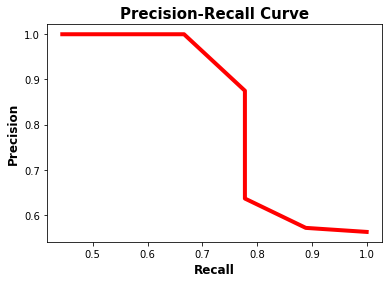

In [28]:
import matplotlib.pyplot

matplotlib.pyplot.plot(recalls, precisions, linewidth=4, color="red")
matplotlib.pyplot.xlabel("Recall", fontsize=12, fontweight='bold')
matplotlib.pyplot.ylabel("Precision", fontsize=12, fontweight='bold')
matplotlib.pyplot.title("Precision-Recall Curve", fontsize=15, fontweight="bold")
matplotlib.pyplot.show()

Note that as the recall increases, the precision decreases. The reason is that when the number of positive samples increases (high recall), the accuracy of classifying each sample correctly decreases (low precision). This is expected, as the model is more likely to fail when there are many samples.

The precision-recall curve makes it easy to decide the point where both the precision and recall are high. According to the previous figure, the best point is (recall, precision)=(0.778, 0.875).

Graphically deciding the best values for both the precision and recall might work using the previous figure because the curve is not complex. A better way is to use a metric called the f1 score, which is calculated according to the next equation.

<div> <img src="images/fig53.png" alt="Drawing" style="width: 200px;"/></div> 

The f1 metric measures the balance between precision and recall. When the value of f1 is high, this means both the precision and recall are high. A lower f1 score means a greater imbalance between precision and recall.

According to the previous example, the f1 is calculated according to the code below. According to the values in the f1 list, the highest score is 0.82352941. It is the 6th element in the list (i.e. index 5). The 6th elements in the recalls and precisions lists are 0.778 and 0.875, respectively. The corresponding threshold value is 0.45.

In [32]:
f1 = 2 * ((numpy.array(precisions) * numpy.array(recalls)) / (numpy.array(precisions) + numpy.array(recalls)))
f1

array([0.72      , 0.69565217, 0.69565217, 0.7       , 0.73684211,
       0.82352941, 0.82352941, 0.8       , 0.71428571, 0.61538462])

In [33]:
max(f1)

0.823529411764706

In [35]:
numpy.argmax(f1)

5

The next figure shows, in blue, the location of the point that corresponds to the best balance between the recall and the precision. In conclusion, the best threshold to balance the precision and recall is 0.45 at which the precision is 0.875 and the recall is 0.778.

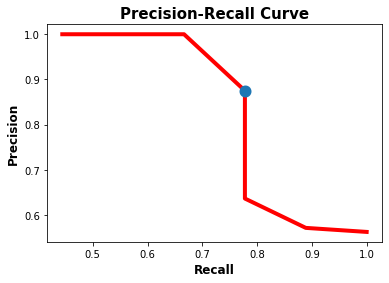

In [36]:
matplotlib.pyplot.plot(recalls, precisions, linewidth=4, color="red", zorder=0)
matplotlib.pyplot.scatter(recalls[5], precisions[5], zorder=1, linewidth=6)

matplotlib.pyplot.xlabel("Recall", fontsize=12, fontweight='bold')
matplotlib.pyplot.ylabel("Precision", fontsize=12, fontweight='bold')
matplotlib.pyplot.title("Precision-Recall Curve", fontsize=15, fontweight="bold")
matplotlib.pyplot.show()

After the precision-recall curve is discussed, the next section discusses how to calculate the average precision.

## Average Precision (AP)

The average precision (AP) is a way to summarize the precision-recall curve into a single value representing the average of all precisions. The AP is calculated according to the next equation. Using a loop that goes through all precisions/recalls, the difference between the current and next recalls is calculated and then multiplied by the current precision. In other words, **the AP is the weighted sum of precisions at each threshold where the weight is the increase in recall**.

<div> <img src="images/fig54.png" alt="Drawing" style="width: 400px;"/></div>

It is important to append the recalls and precisions lists by 0 and 1, respectively. For example, if the recalls list is 

> 0.8,0.6

then it should have 0 appended to be

> 0.8,0.6,0.0

The same happens for the precisions list but have 1 rather than 0 appended (e.g.

> 0.8,0.6,1.0

Given that both recalls and precisions are NumPy arrays, the previous equation is modeled according to the next Python line.

In [37]:
AP = numpy.sum((recalls[:-1] - recalls[1:]) * precisions[:-1])

TypeError: unsupported operand type(s) for -: 'list' and 'list'

Here is the complete code that calculates the AP.

In [38]:
import numpy
import sklearn.metrics

def precision_recall_curve(y_true, pred_scores, thresholds):
    precisions = []
    recalls = []
    
    for threshold in thresholds:
        y_pred = ["positive" if score >= threshold else "negative" for score in pred_scores]

        precision = sklearn.metrics.precision_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
        recall = sklearn.metrics.recall_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
        
        precisions.append(precision)
        recalls.append(recall)

    return precisions, recalls

y_true = ["positive", "negative", "negative", "positive", "positive", "positive", "negative", "positive", "negative", "positive", "positive", "positive", "positive", "negative", "negative", "negative"]
pred_scores = [0.7, 0.3, 0.5, 0.6, 0.55, 0.9, 0.4, 0.2, 0.4, 0.3, 0.7, 0.5, 0.8, 0.2, 0.3, 0.35]
thresholds=numpy.arange(start=0.2, stop=0.7, step=0.05)

precisions, recalls = precision_recall_curve(y_true=y_true, 
                                             pred_scores=pred_scores, 
                                             thresholds=thresholds)

precisions.append(1)
recalls.append(0)

precisions = numpy.array(precisions)
recalls = numpy.array(recalls)

AP = numpy.sum((recalls[:-1] - recalls[1:]) * precisions[:-1])
print(AP)

0.8898809523809523


This is all about the average precision. Here is a summary of the steps to calculate the AP:

- Generate the **prediction scores** using the model.
- Convert the **prediction scores to class labels**.
- Calculate the **confusion matrix**.
- Calculate the **precision and recall** metrics.
- Create the **precision-recall curve**.
- Measure the **average precision**.

The next section talks about the **intersection over union (IoU)** which is how an object detection generates the prediction scores.

## Intersection over Union (IoU)

To train an object detection model, usually, there are 2 inputs:

- An image.
- Ground-truth bounding boxes for each object in the image.

The model predicts the bounding boxes of the detected objects. It is expected that the predicted box will not match exactly the ground-truth box. The next figure shows a cat image. The ground-truth box of the object is in red while the predicted one is in yellow. Based on the visualization of the 2 boxes, is the model made a good prediction with a high match score?

It is difficult to subjectively evaluate the model predictions. For example, someone may conclude that there is a 50% match while someone else notices that there is a 60% match.

<div> <img src="images/fig55.png" alt="Drawing" style="width: 500px;"/></div> 

A better alternative is to use a quantitative measure to score how the ground-truth and predicted boxes match. This measure is the **intersection over union (IoU)**. The IoU helps to know if a region has an object or not.

The IoU is calculated according to the next equation by dividing the area of intersection between the 2 boxes by the area of their union. The higher the IoU, the better the prediction.

<div> <img src="images/fig56.png" alt="Drawing" style="width: 500px;"/></div> 

The next figure shows 3 cases with different IoUs. Note that the IoUs at the top of each case are objectively measured and may differ a bit from the reality but it makes sense.

For case A, the predicted box in yellow is so far from being aligned on the red ground-truth box and thus the IoU score is 0.2 (i.e. there is only a 20% overlap between the 2 boxes).

For case B, the intersection area between the 2 boxes is larger but the 2 boxes are still not aligned well and thus the IoU score is 0.5.

For case C, the coordinates of the 2 boxes are so close and thus their IoU is 0.9 (i.e. there is a 90% overlap between the 2 boxes).

Note that the IoU is 0.0 when there is a 0% overlap between the predicted and ground-truth boxes. The IoU is 1.0 when the 2 boxes fit each other 100%.

<div> <img src="images/fig57.png" alt="Drawing" style="width: 500px;"/></div> 

To calculate the IoU for an image, here is a function named intersection_over_union(). It accepts the following 2 parameters:

1. `gt_box`: Ground-truth bounding box.
2. `pred_box`: Predicted bounding box.

It calculates the intersection and union between the 2 boxes in the `intersection` and `union` variables, respectively. Moreover, the IoU is calculated in the `iou` variable. It returns all of these 3 variables.

In [40]:
def intersection_over_union(gt_box, pred_box):
    inter_box_top_left = [max(gt_box[0], pred_box[0]), max(gt_box[1], pred_box[1])]
    inter_box_bottom_right = [min(gt_box[0]+gt_box[2], pred_box[0]+pred_box[2]), min(gt_box[1]+gt_box[3], pred_box[1]+pred_box[3])]

    inter_box_w = inter_box_bottom_right[0] - inter_box_top_left[0]
    inter_box_h = inter_box_bottom_right[1] - inter_box_top_left[1]

    intersection = inter_box_w * inter_box_h
    union = gt_box[2] * gt_box[3] + pred_box[2] * pred_box[3] - intersection
    
    iou = intersection / union

    return iou, intersection, union

The bounding box passed to the function is a list of 4 elements which are:

- The x-axis of the top-left corner.
- The y-axis of the top-left corner.
- Width.
- Height.

Here are the ground-truth and predicted bounding boxes of the cat image.

In [41]:
gt_box = [45, 28, 140, 210]
pred_box = [30, 40, 140, 140]

Given that the image of the cat, here is the complete that draws the bounding boxes over the image.

[]

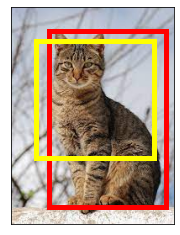

In [50]:
import imageio
import matplotlib.pyplot
import matplotlib.patches

def intersection_over_union(gt_box, pred_box):
    inter_box_top_left = [max(gt_box[0], pred_box[0]), max(gt_box[1], pred_box[1])]
    inter_box_bottom_right = [min(gt_box[0]+gt_box[2], pred_box[0]+pred_box[2]), min(gt_box[1]+gt_box[3], pred_box[1]+pred_box[3])]

    inter_box_w = inter_box_bottom_right[0] - inter_box_top_left[0]
    inter_box_h = inter_box_bottom_right[1] - inter_box_top_left[1]

    intersection = inter_box_w * inter_box_h
    union = gt_box[2] * gt_box[3] + pred_box[2] * pred_box[3] - intersection
    
    iou = intersection / union

    return iou, intersection, union

im = imageio.imread("images/fig58.png")

gt_box = [45, 28, 140, 210]
pred_box = [30, 40, 140, 140]

fig, ax = matplotlib.pyplot.subplots(1)
ax.imshow(im)

gt_rect = matplotlib.patches.Rectangle((gt_box[0], gt_box[1]),
                                       gt_box[2],
                                       gt_box[3],
                                       linewidth=5,
                                       edgecolor='r',
                                       facecolor='none')

pred_rect = matplotlib.patches.Rectangle((pred_box[0], pred_box[1]),
                                         pred_box[2],
                                         pred_box[3],
                                         linewidth=5,
                                         edgecolor=(1, 1, 0),
                                         facecolor='none')
ax.add_patch(gt_rect)
ax.add_patch(pred_rect)

ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

To calculate the IoU, just call the intersection_over_union() function. Based on the bounding boxes, the IoU score is 0.56.

In [52]:
iou, intersect, union = intersection_over_union(gt_box, pred_box)
print(iou, intersect, union)

0.5555555555555556 17500 31500


The IoU score 0.56 means there is a **56% overlap between the ground-truth and predicted bounding boxes**. Looking at the boxes, someone may visually feel it is good enough to conclude that the model detected the cat object. Someone else may feel the model is not yet accurate as the predicted box does not fit the ground-truth box well.

To objectively judge whether the model predicted the box location correctly or not, a threshold is used. If the model predicts a box with an IoU score greater than or equal to the threshold, then there is a high overlap between the predicted box and one of the ground-truth boxes. This means the model was able to detect an object successfully. The detected region is classified as **Positive** (i.e. contains an object).

On the other hand, when the IoU score is smaller than the **threshold**, then the model made a bad prediction as the predicted box does not overlap with the ground-truth box. This means the detected region is classified as **Negative** (i.e. does not contain an object).

<div> <img src="images/fig59.png" alt="Drawing" style="width: 500px;"/></div> 

## Mean Average Precision (mAP) for Object Detection

Usually, the object detection models are evaluated with different IoU thresholds where each threshold may give different predictions from the other thresholds. Assume that the model is fed by an image that has 10 objects distributed across 2 classes. How to calculate the mAP?

**To calculate the mAP, start by calculating the AP for each class. The mean of the APs for all classes is the mAP.**

Assuming that the dataset used has only 2 classes. For the first class, here are the ground-truth labels and predicted scores in the `y_true` and `pred_scores` variables, respectively.

In [58]:
y_true1 = ["positive", "negative", "positive", "negative", "positive", "positive", "positive", "negative", "positive", "negative"]

pred_scores1 = [0.7, 0.3, 0.5, 0.6, 0.55, 0.9, 0.75, 0.2, 0.8, 0.3]

Here are the `y_true` and `pred_scores` variables of the second class.

In [59]:
y_true2 = ["negative", "positive", "positive", "negative", "negative", "positive", "positive", "positive", "negative", "positive"]

pred_scores2 = [0.32, 0.9, 0.5, 0.1, 0.25, 0.9, 0.55, 0.3, 0.35, 0.85]

The list of IoU thresholds starts from 0.2 to 0.9 with 0.25 step.

In [60]:
thresholds = numpy.arange(start=0.2, stop=0.9, step=0.05)

To calculate the AP for a class, just feed its y_true and pred_scores variables to the next code.

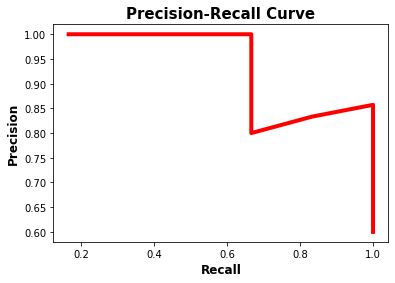

0.9484126984126984


In [61]:
precisions, recalls = precision_recall_curve(y_true=y_true1, 
                                             pred_scores=pred_scores1, 
                                             thresholds=thresholds)

matplotlib.pyplot.plot(recalls, precisions, linewidth=4, color="red", zorder=0)

matplotlib.pyplot.xlabel("Recall", fontsize=12, fontweight='bold')
matplotlib.pyplot.ylabel("Precision", fontsize=12, fontweight='bold')
matplotlib.pyplot.title("Precision-Recall Curve", fontsize=15, fontweight="bold")
matplotlib.pyplot.show()

precisions.append(1)
recalls.append(0)

precisions = numpy.array(precisions)
recalls = numpy.array(recalls)

AP = numpy.sum((recalls[:-1] - recalls[1:]) * precisions[:-1])
print(AP)

For the first class, here is its precision-recall curve. Based on this curve, the AP is 0.949.

The precision-recall curve of the second class is shown below. Its AP is 0.958.

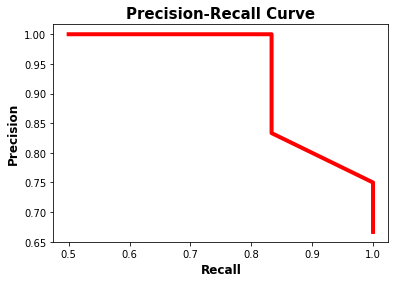

0.9583333333333334


In [62]:
precisions, recalls = precision_recall_curve(y_true=y_true2, 
                                             pred_scores=pred_scores2, 
                                             thresholds=thresholds)

matplotlib.pyplot.plot(recalls, precisions, linewidth=4, color="red", zorder=0)

matplotlib.pyplot.xlabel("Recall", fontsize=12, fontweight='bold')
matplotlib.pyplot.ylabel("Precision", fontsize=12, fontweight='bold')
matplotlib.pyplot.title("Precision-Recall Curve", fontsize=15, fontweight="bold")
matplotlib.pyplot.show()

precisions.append(1)
recalls.append(0)

precisions = numpy.array(precisions)
recalls = numpy.array(recalls)

AP = numpy.sum((recalls[:-1] - recalls[1:]) * precisions[:-1])
print(AP)

Based on the APs of the 2 classes (0.949 and 0.958), the mAP of the object detection model is calculated according to the next equation.

<div> <img src="images/fig60.png" alt="Drawing" style="width: 500px;"/></div> 

Based on this equation, the mAP is 0.9535.

In [65]:
mAP = (0.949 + 0.958)/2
mAP

0.9535

## Conclusion

This tutorial discussed how to calculate the mean average precision (mAP) for an object detection model. We started by discussing how to convert a prediction score to a class label. Using different thresholds, a precision-recall curve is created. From that curve, the average precision (AP) is measured.

For an object detection model, the threshold is the intersection over union (IoU) that scores the detected objects. Once the AP is measured for each class in the dataset, the mAP is calculated.